### Media Company Case study

**Problem Statement**: A digital media company launced a show. Initialy there was a high viewership but after sometime, the viewership went low. Where was the problem and what can be done ?

**Colums Definitions**
1. Date - Date of the given record / row.
2. Views_show - No of people that viewed the show on that day.
3. Visitors - NO of visitors to the show.
4. Views_platform - No of visitors to the given platform (in this case Hotstar)
5. Ad_impression - Marketting strength.
6. Cricket_match_india - Whether there was a cricket match that day (The data is based on an Indian platform and most people in India love cricket. If the match time coincides with show time, the show may be affected)
7. Character_A - The influence of a given Character if any

In [52]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# load data
media = pd.read_csv('mediacompany.csv')

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [54]:
# check info about dataset
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
Unnamed: 7             0 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 5.1+ KB


In [55]:
#  there is a column called unamed:7 with pure null values
# we drop ther column
media = media.drop(['Unnamed: 7'], axis=1)

# there is also a date column whose dtype is object
# we convert it to date object
media['Date'] = pd.to_datetime(media['Date']).dt.date


media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [56]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
Date                   80 non-null object
Views_show             80 non-null int64
Visitors               80 non-null int64
Views_platform         80 non-null int64
Ad_impression          80 non-null int64
Cricket_match_india    80 non-null int64
Character_A            80 non-null int64
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [57]:
# we want to see how the show progressed since being launched
# hence, we will have a days column indicating days since 1st show
from datetime import date

d0 = date(2017, 2, 28) #counting from last day of Feb
d1 = media.Date
delta = d1 - d0
media['day'] = delta
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [58]:
# we need to remove the 'days' suffix from the day column
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x:x[0:2])
media['day'] = media['day'].astype(int)

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


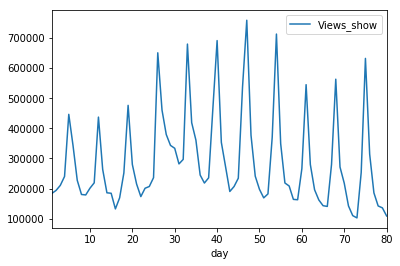

In [59]:
# data visualization for daily viewership trend
media.plot.line(x='day', y='Views_show')

There seems to be days when the viewership is high, possibly weekends...Generally this viewership was increasing untill at some point when it had a decrease

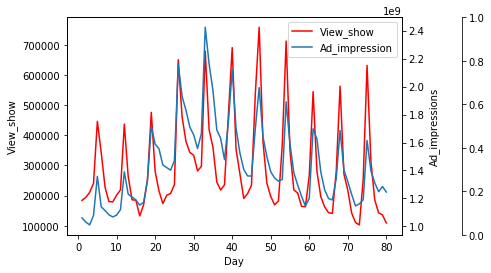

In [60]:
# plot date vs views and date vs ads
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View_show')
par1.set_ylabel('Ad_impressions')

p1, = host.plot(media.day, media.Views_show, label='View_show', color='red')
p2, = par1.plot(media.day, media.Ad_impression, label='Ad_impression')

lns = [p1, p2]
host.legend(handles=lns, loc='best')

par2.spines['right'].set_position(('outward', 60))


In [61]:
# giving days a variable 1 is sunday 7 is saturday
# the first day (from calendar) is a wednesday
media['weekday'] = (media['day'] + 3) % 7
media.weekday.replace(0, 7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


#### Running first model, weekdays and visitors


In [62]:
# putting feature variables
X = media[['Visitors', 'weekday']]

# putting label / response variable
y = media['Views_show']

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
# checking summarynwith statsmodel
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()

lm_1.summary()

/home/namrehs/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           8.01e-12
Time:                        16:41:22   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.862e+04   1.07e+05     -0.360      0.720   -2.52e+05    1.75e+05
Visitors       0.2787      0.057      4.911      0.000       0.166       0.392
weekday    -3.591e+04   6591.205     -5.448      0.000    -4.9e+04   -2.28e+04
==============================================================================
Omnibus:                        2.684   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                2.653
Skew:                           0.423   Prob(JB):                        0.265
Kurtosis:                       2.718   Cond. No.                     1.46e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R_Squared and adjusted R_Squared are not good enough**

In [65]:
# we want to create two condition variables for weekday column. 1 for weekend 0 for weekday
def day_cond(i):
    if i % 7 == 4: return 1
    elif i % 7 == 5: return 1
    else: return 0
    return i

media['weekend'] = [day_cond(i) for i in media['day']]

media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,1


#### Running second model that considers weekdays and weekends as 2 things

In [68]:
# set features
X = media[['Visitors', 'weekend']]
y = media['Views_show']

X = sm.add_constant(X)
lm_2 = sm.OLS(y, X).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           2.51e-12
Time:                        16:45:22   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.384   -2.89e+05    1.13e+05
Visitors       0.1934      0.061      3.160      0.002       0.071       0.315
weekend     1.807e+05   3.15e+04      5.740      0.000    1.18e+05    2.43e+05
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.367
Skew:                           0.270   Prob(JB):                        0.505
Kurtosis:                       2.656   Cond. No.                     1.41e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running model 3: Weekend, visitors, character A

How does the precesne or abscence of this character affect views

In [71]:
X = media[['Visitors', 'weekend', 'Character_A']]
y = media['Views_show']

X = sm.add_constant(X)
lm_3 = sm.OLS(y, X).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.53e-14
Time:                        18:08:38   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      0.613   -2.33e+05    1.38e+05
Visitors        0.1480      0.057      2.586      0.012       0.034       0.262
weekend      1.812e+05   2.89e+04      6.281      0.000    1.24e+05    2.39e+05
Character_A  9.542e+04   2.41e+04      3.963      0.000    4.75e+04    1.43e+05
==============================================================================
Omnibus:                        0.908   Durbin-Watson:                   1.600
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.876
Skew:                          -0.009   Prob(JB):                        0.645
Kurtosis:                       2.488   Cond. No.                     1.42e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Running model 4: Weekend, visitors, character A and Ad_impression

How will adding the Ad_impression (marketting budget) affect the model ?

In [73]:
X = media[['Visitors', 'weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

X = sm.add_constant(X)
lm_4 = sm.OLS(y, X).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.10e-25
Time:                        18:16:50   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067      0.000   -4.22e+05   -1.45e+05
Visitors          0.0144      0.042      0.340      0.735      -0.070       0.099
weekend        1.485e+05   2.04e+04      7.296      0.000    1.08e+05    1.89e+05
Character_A   -2.934e+04   2.16e+04     -1.356      0.179   -7.24e+04    1.38e+04
Ad_impression     0.0004   3.96e-05      9.090      0.000       0.000       0.000
==============================================================================
Omnibus:                        4.808   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.007
Skew:                           0.476   Prob(JB):                        0.135
Kurtosis:                       3.545   Cond. No.                     1.32e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**We can see that the R squared value significantly increases, however, P value for visitors and character A are greatly affected. The coeffcient of Character A also becomes negative**

#### Running model 5: Weekend, character A and Ad_impression

We eliminate visitors (due to its high P value) to see how weekend, character A and ad_impression would influence the model

In [74]:
X = media[['Character_A', 'Ad_impression', 'weekend']]
y = media['Views_show']

X = sm.add_constant(X)
lm_5 = sm.OLS(y, X).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.05e-26
Time:                        18:20:37   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Character_A    -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
Ad_impression     0.0004   3.69e-05      9.875      0.000       0.000       0.000
weekend         1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Even though character A has remained to have a negative impact, the P values have greatly improved**

#### Running model 6: Weekend, character A, Ad_impression, Cricket match

We add cricket match to see how it would influence the model

In [75]:
X = media[['Character_A', 'Ad_impression', 'weekend', 'Cricket_match_india']]
y = media['Views_show']

X = sm.add_constant(X)
lm_5 = sm.OLS(y, X).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.02e-25
Time:                        18:26:48   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.633e+05    4.8e+04     -5.484      0.000   -3.59e+05   -1.68e+05
Character_A         -3.196e+04   2.19e+04     -1.457      0.149   -7.57e+04    1.17e+04
Ad_impression           0.0004   3.71e-05      9.802      0.000       0.000       0.000
weekend              1.521e+05    1.9e+04      7.987      0.000    1.14e+05     1.9e+05
Cricket_match_india -1.396e+04   2.74e+04     -0.510      0.612   -6.85e+04    4.06e+04
==============================================================================
Omnibus:                        5.270   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.560
Skew:                           0.468   Prob(JB):                        0.102
Kurtosis:                       3.701   Cond. No.                     9.32e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.32e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**seemingly cricket match india has a very high P value. Hence may not be necessarily useful** 

From the model also, the coefficient of ad_impressions is also very small compared to the rest. Representing the ad_impressions in millions will probably solve this. Lets try.

In [77]:
media['ad_impression_million'] = media['Ad_impression'] / 1000000

X = media[['Character_A', 'ad_impression_million', 'weekend']]
y = media['Views_show']

X = sm.add_constant(X)
lm_6 = sm.OLS(y, X).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.05e-26
Time:                        19:00:04   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+05   4.74e+04     -5.609      0.000   -3.61e+05   -1.72e+05
Character_A            -2.99e+04   2.14e+04     -1.394      0.167   -7.26e+04    1.28e+04
ad_impression_million   364.4670     36.909      9.875      0.000     290.957     437.977
weekend                 1.51e+05   1.88e+04      8.019      0.000    1.14e+05    1.89e+05
==============================================================================
Omnibus:                        4.723   Durbin-Watson:                   1.169
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                3.939
Skew:                           0.453   Prob(JB):                        0.139
Kurtosis:                       3.601   Cond. No.                     9.26e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Making predictions using lm_6

In [78]:
predicted_views = lm_6.predict(X)

In [79]:
from sklearn.metrics import r2_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(media.Views_show, predicted_views))
r_squared = r2_score(media.Views_show, predicted_views)

print('RMSE: ', rmse)
print('R_Squared: ', r_squared)

RMSE:  68393.35944558805
R_Squared:  0.802643446857565


In [80]:
# checking shape of data
media.shape

(80, 11)

Text(0, 0.5, 'Views')

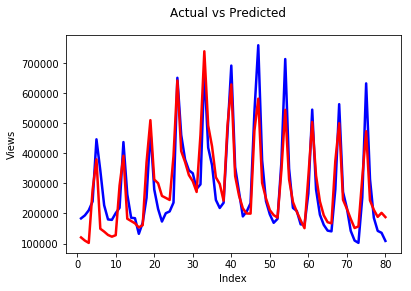

In [81]:
# comparing actual and predicted value
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show, linewidth=2.5, color='blue' )
plt.plot(c, predicted_views, linewidth=2.5, color='red')
fig.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Views')

From the graph above its clear that the model is quite good

Text(0, 0.5, 'Views_show-predicted_views')

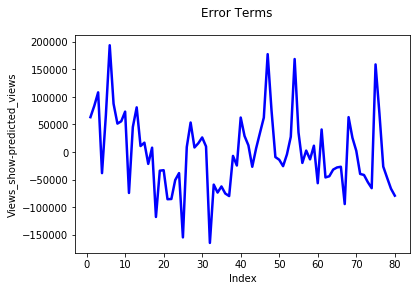

In [83]:
# checking error terms
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show - predicted_views, linewidth=2.5, color='blue' )
fig.suptitle('Error Terms')
plt.xlabel('Index')
plt.ylabel('Views_show-predicted_views')

#### Making prediction with lm_4 model to see how it compares.

In [93]:
X = media[['Visitors', 'weekend', 'Character_A', 'Ad_impression']]
y = media['Views_show']

X = sm.add_constant(X)
lm_4 = sm.OLS(y, X).fit()

/home/namrehs/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [98]:
predicted_views_4 = lm_4.predict(X)

In [99]:
rmse = np.sqrt(mean_squared_error(media.Views_show, predicted_views_4))
r_squared = r2_score(media.Views_show, predicted_views_4)

print('RMSE: ', rmse)
print('R_Squared: ', r_squared)

RMSE:  68340.83427572125
R_Squared:  0.802946464753367


Text(0, 0.5, 'Views')

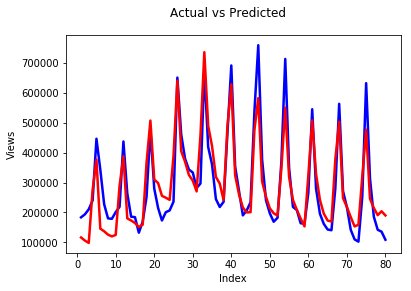

In [100]:
# comparing actual and predicted value
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show, linewidth=2.5, color='blue' )
plt.plot(c, predicted_views_4, linewidth=2.5, color='red')
fig.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Views')

Text(0, 0.5, 'Views_show-predicted_views')

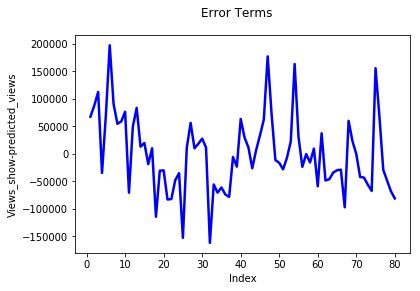

In [101]:
# checking error terms
c = [i for i in range(1, 81, 1)]
fig = plt.figure()
plt.plot(c, media.Views_show - predicted_views, linewidth=2.5, color='blue' )
fig.suptitle('Error Terms')
plt.xlabel('Index')
plt.ylabel('Views_show-predicted_views')

#### The models are almost similar but due to the p value we prefer the last model to be cretaed (lm_6)